In [1]:
# Import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import math

# Apply the default theme
sns.set_theme()


# data_gasprice = MIN_DATA_GASPRICE * e**(excess_data_gas / DATA_GASPRICE_UPDATE_FRACTION)

In [2]:
##### CONSTANTS
 
MAX_DATA_GAS_PER_BLOCK = 2**19
TARGET_DATA_GAS_PER_BLOCK = 2**18
MIN_DATA_GASPRICE = 1
DATA_GASPRICE_UPDATE_FRACTION = 2225652
DATA_GAS_PER_BLOB = 2**17
FIELD_ELEMENTS_PER_BLOB = 4096

MAX_BLOB_COMMITMENTS_PER_BLOCK = MAX_DATA_GAS_PER_BLOCK // DATA_GAS_PER_BLOB

In [3]:
#### Init Dataframes

# d = {'block_num': [], 'data_gas_price': [], 'excess_data_gas': []}
# df = pd.DataFrame(data=d)


block_num_vec = []
excess_data_gas_vec = []
data_gas_price_vec = []

In [4]:
# def calc_excess_data_gas(parent: Header, new_blobs: int) -> int:
#     consumed_data_gas = new_blobs * DATA_GAS_PER_BLOB
#     if parent.excess_data_gas + consumed_data_gas < TARGET_DATA_GAS_PER_BLOCK:
#         return 0
#     else:
#         return parent.excess_data_gas + consumed_data_gas - TARGET_DATA_GAS_PER_BLOCK

def calc_excess_data_gas(parent_excess_data_gas: int, new_blobs: int):
    consumed_data_gas = new_blobs * DATA_GAS_PER_BLOB
    if parent_excess_data_gas + consumed_data_gas < TARGET_DATA_GAS_PER_BLOCK:
         return 0
    else:
        return parent_excess_data_gas + consumed_data_gas - TARGET_DATA_GAS_PER_BLOCK
    
def calc_data_gasprice(excess_data_gas:int):
    data_gasprice = MIN_DATA_GASPRICE * math.e**(excess_data_gas / DATA_GASPRICE_UPDATE_FRACTION)
    return data_gasprice

In [5]:
#### Populate Data
block_num_vec.append(1)
excess_data_gas_vec.append(0)
data_gas_price_vec.append(0)

# iterate over 100 blocks w/ max data blobs
for i in range(1,100):
    block_num_vec.append(i)
    # excess data gas
    prevExcessDataGas = excess_data_gas_vec[i-1]
    nextExcessDataGas = calc_excess_data_gas(prevExcessDataGas, 4)
    excess_data_gas_vec.append(nextExcessDataGas)
    # data gas price
    data_gas_price = calc_data_gasprice(prevExcessDataGas)
    data_gas_price_vec.append(data_gas_price)
    
for i in range(100,200):
    block_num_vec.append(i)
    # excess data gas
    prevExcessDataGas = excess_data_gas_vec[i-1]
    nextExcessDataGas = calc_excess_data_gas(prevExcessDataGas, 0)
    excess_data_gas_vec.append(nextExcessDataGas)
    # data gas price
    data_gas_price = calc_data_gasprice(prevExcessDataGas)
    data_gas_price_vec.append(data_gas_price)

<AxesSubplot:xlabel='block_nums', ylabel='excess_data_gas'>

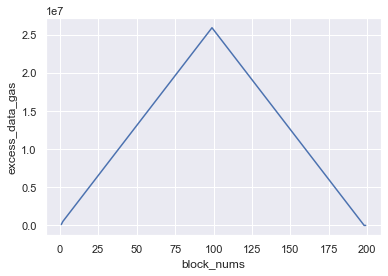

In [6]:
# convert to numpy arrays
block_nums = np.array(block_num_vec)
excess_data_gas = np.array(excess_data_gas_vec)
data_gas_price = np.array(data_gas_price_vec)

# convert to pandas dataframe
d = {'block_nums': block_nums, 'excess_data_gas': excess_data_gas, 'data_gas_price': data_gas_price}
pd = pd.DataFrame(d)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='block_nums', y='excess_data_gas', data=pd)

<AxesSubplot:xlabel='block_nums', ylabel='data_gas_price'>

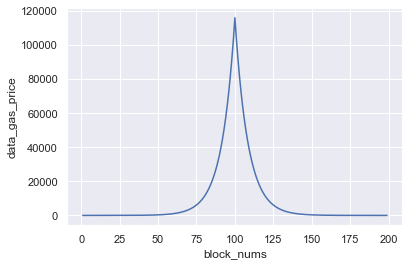

In [7]:
sns.lineplot(x='block_nums', y='data_gas_price', data=pd)

In [8]:
pd

,block_nums,excess_data_gas,data_gas_price
0,1,0,0.000000
1,1,262144,1.000000
2,2,524288,1.125000
3,3,786432,1.265625
4,4,1048576,1.423828
...,...,...,...
195,195,786432,1.601806
196,196,524288,1.423828
197,197,262144,1.265625
198,198,0,1.125000
